<a href="https://colab.research.google.com/github/FAKIHAKHAN/Deep-Learning-Projects/blob/main/Prediction_of_Diabetes_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning with Keras**:
Binary Classification Assignment Overview:

In this hands-on assignment, you will build and train your first neural network using Keras and TensorFlow to solve a binary classification problem. You'll work with the famous Pima Indians Diabetes dataset to predict whether a patient has diabetes based on various medical measurements. This assignment will guide you through the complete machine learning pipeline from data loading to model evaluation.

**Learning Objectives**

By completing this assignment, you will:

* Load and explore tabular data using pandas
* Preprocess data for neural network training
* Build a feedforward neural network using Keras
* Train a model with proper validation techniques
* Evaluate model performance using multiple metrics
* Understand the basics of hyperparameter tuning

**Dataset Description**

You'll be working with the Pima Indians Diabetes dataset, which contains medical diagnostic measurements for 768 female patients of Pima Indian heritage. The goal is to predict the onset of diabetes based on diagnostic measurements.
Features:

1. Pregnancies: Number of times pregnant

2. Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test

3. BloodPressure: Diastolic blood pressure (mm Hg)

4. SkinThickness: Triceps skin fold thickness (mm)

5. Insulin: 2-Hour serum insulin (mu U/ml)

6. BMI: Body mass index (weight in kg/(height in m)^2)

7. DiabetesPedigreeFunction: Diabetes pedigree function (genetic predisposition)

8. Age: Age in years

Target:

Outcome: 0 (no diabetes) or 1 (diabetes)


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Deep Learning with Keras - Diabetes Prediction Assignment")
print("=" * 55)

# Method 1: Load data from URL (recommended)
try:
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

    # Column names for the dataset
    column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

    # Load the dataset
    df = pd.read_csv(url, names=column_names)
    print("✓ Dataset loaded successfully from URL")
    print(f"Dataset shape: {df.shape}")

except Exception as e:
    print(f"Error loading from URL: {e}")
    print("Please download the dataset manually and use Method 2")

# Method 2: Load from local file (alternative)
# If you have downloaded the dataset locally, uncomment the following lines:
# df = pd.read_csv('diabetes.csv')  # Make sure the file is in your working directory
# print("✓ Dataset loaded successfully from local file")

# Quick data overview
print("\nDataset Info:")
print(df.info())
print(f"\nTarget distribution:")
print(df['Outcome'].value_counts())
print(f"Class balance: {df['Outcome'].value_counts(normalize=True).round(3)}")

print("\nFirst 5 rows:")
print(df.head())

print("\nYour deep learning journey begins here!")
print("Follow the assignment instructions to complete each part.")

Deep Learning with Keras - Diabetes Prediction Assignment
✓ Dataset loaded successfully from URL
Dataset shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Class balance: Outcome
0 

Checking for duplicate Rows

In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Checking for Percentage of missing values for a feature

In [ ]:
missing = df.isnull().sum()
missing_prct = (missing*100)/len(df)
missing_prct

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
numerical_features =  df.select_dtypes(include =[np.number]).columns.tolist()

## Plotting distribution of features

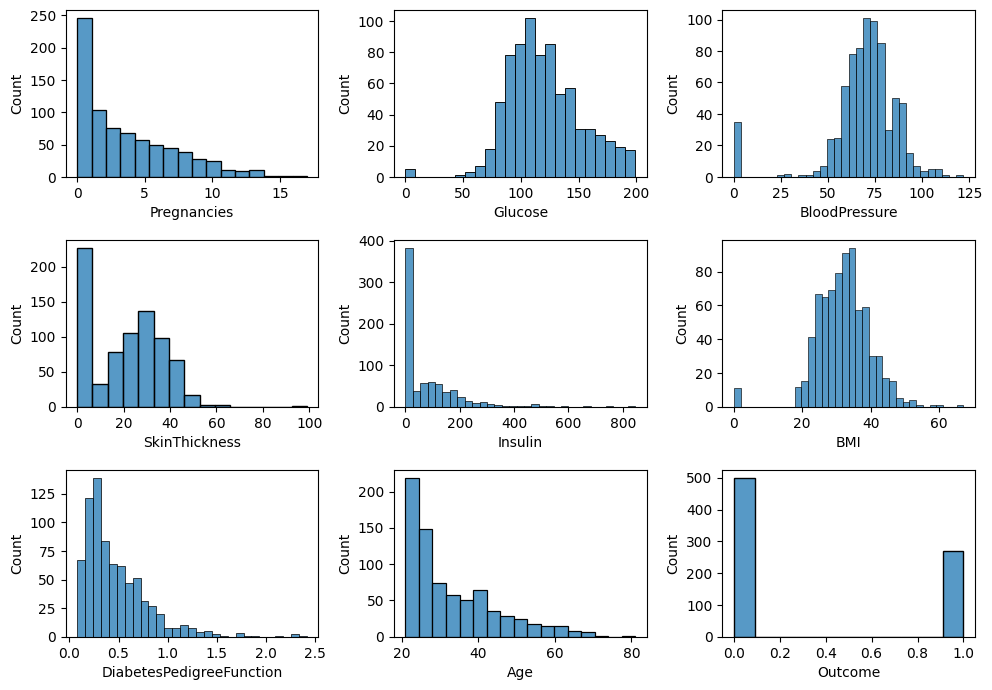

In [ ]:
plt.figure(figsize=(10,7))
inx=1
for col in numerical_features:
    plt.subplot(3,3,inx)
    sns.histplot(df[col])
    inx=inx+1

plt.tight_layout()

## Plotting Box Plot to detect Outliers

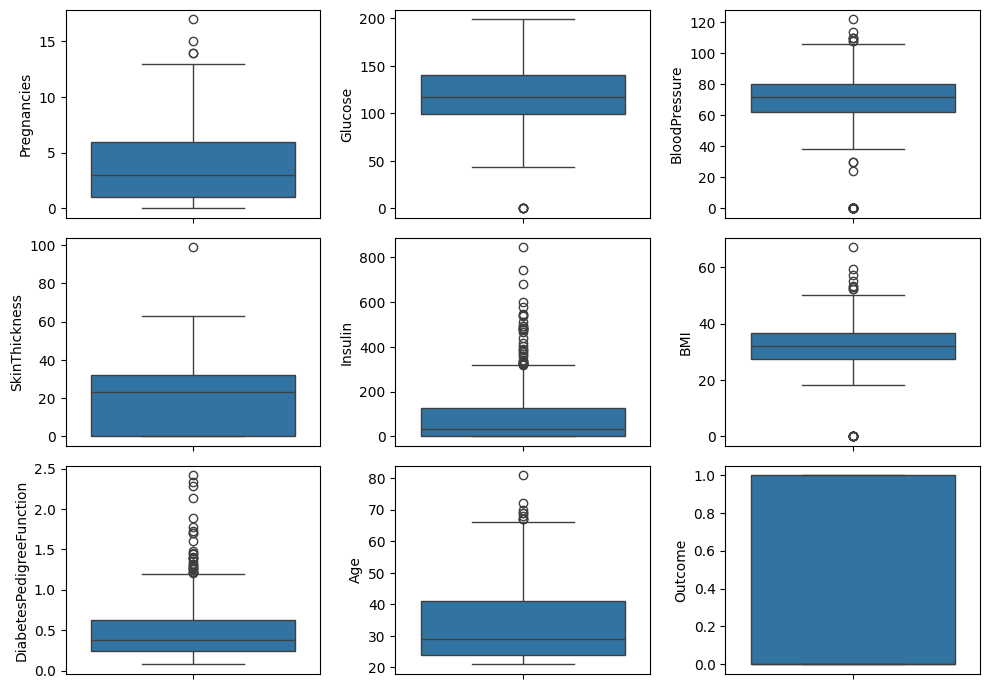

In [ ]:
plt.figure(figsize=(10,7))
inx=1
for col in numerical_features:
    plt.subplot(3,3,inx)
    sns.boxplot(df[col])
    inx=inx+1

plt.tight_layout()

 ## Handle Outliers

 BMI cannot be zero, Similarly, skin thickness to be out of normal range is also unlikely, Chances of Blood pressure to be zeros is also unlikely.


In [ ]:
invalid_cols = ["Glucose", "BloodPressure", "BMI"]
df_clean = df.copy()
df_clean = df_clean[(df_clean[invalid_cols] != 0).all(axis=1)]

In [ ]:
df_clean = df_clean[(df_clean['SkinThickness'] <= 80)]

In [ ]:
df_clean.shape

(723, 9)

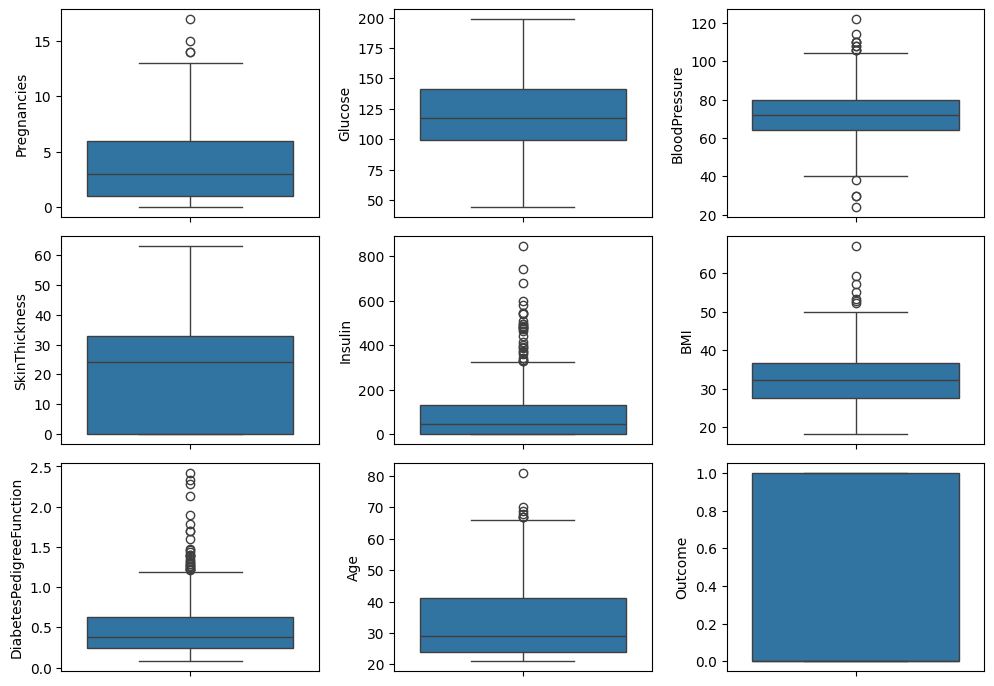

In [ ]:
plt.figure(figsize=(10,7))
inx=1
for col in numerical_features:
    plt.subplot(3,3,inx)
    sns.boxplot(df_clean[col])
    inx=inx+1

plt.tight_layout()

In [ ]:
outlier_info= {}

for col in numerical_features:
  Q1 = df_clean[col].quantile(0.25)
  Q3= df_clean[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound= Q1 - 1.5 * IQR
  upper_bound= Q3 + 1.5 * IQR
  outliers = df_clean[(df_clean[col]< lower_bound) | (df_clean[col]> upper_bound)]
  outlier_info[col]= {"Lower Bound": lower_bound,"Upper Bound":upper_bound, "Outlier Count": outliers.shape[0]}

print("\n Outlier Summary:")
for col, info in outlier_info.items():
  print (f"{col}: {info['Outlier Count']} outliers")

for col in numerical_features:
  q1 = df_clean[col].quantile(0.01)
  q99 = df_clean[col].quantile(0.99)
  df_clean[col]=np.clip(df_clean[col],q1,q99)




 Outlier Summary:
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 0 outliers
Insulin: 29 outliers
BMI: 7 outliers
DiabetesPedigreeFunction: 28 outliers
Age: 7 outliers
Outcome: 0 outliers


In [ ]:
outlier_info= {}

for col in numerical_features:
  Q1 = df_clean[col].quantile(0.25)
  Q3= df_clean[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound= Q1 - 1.5 * IQR
  upper_bound= Q3 + 1.5 * IQR
  outliers = df_clean[(df_clean[col]< lower_bound) | (df_clean[col]> upper_bound)]
  outlier_info[col]= {"Lower Bound": lower_bound,"Upper Bound":upper_bound, "Outlier Count": outliers.shape[0]}

print("\n Outlier Summary:")
for col, info in outlier_info.items():
  print (f"{col}: {info['Outlier Count']} outliers")


 Outlier Summary:
Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 10 outliers
SkinThickness: 0 outliers
Insulin: 29 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 28 outliers
Age: 0 outliers
Outcome: 0 outliers


In [ ]:
df_clean.shape

(723, 9)

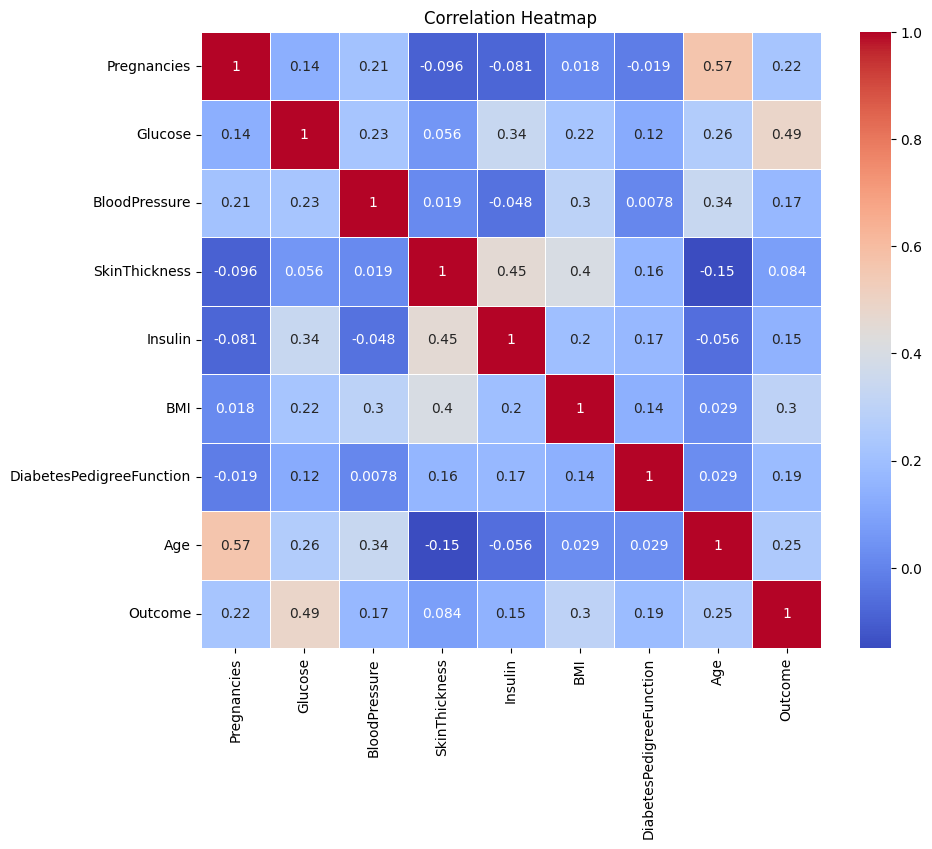

In [ ]:
corelation_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We will perform minmax scaler to reduce the biasness towards a specific feature, as BP are in high range and pregnancies are low range feature.

<Axes: ylabel='count'>

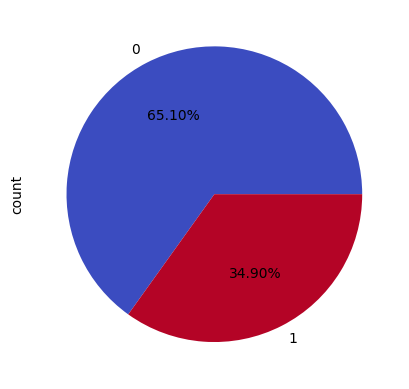

In [ ]:
# To visualize Distribution of label
df['Outcome'].value_counts().plot(kind='pie',autopct="%1.2f%%", cmap="coolwarm")

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test= train_test_split( X, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
sc=MinMaxScaler()
sc.fit(x_train) # picks max value fromx train
sc_x_train=sc.transform(x_train) # scales all x_test and train wih max of x_train
sc_x_test=sc.transform(x_test)

# Part 3: Model Building


In [ ]:
x_train.shape

(614, 8)

Loss function is binary cross entropy because it is used for binary classification. Detecting Diabetics is important, and missing true cases is risky so I have used Precision metric.

In [ ]:
model2=Sequential()
# Input layer with 4 features
model2.add(Dense(16, input_dim=8, activation='relu'))  # more neurons for learning power
model2.add(Dense(12, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(14, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='AdaGrad',metrics=['precision'])
model2.fit(sc_x_train,y_train,epochs=25)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6909 - precision: 0.0000e+00
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6893 - precision: 0.0000e+00 
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6879 - precision: 0.0000e+00 
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6868 - precision: 0.0000e+00 
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6857 - precision: 0.0000e+00 
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6848 - precision: 0.0000e+00 
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6840 - precision: 0.0000e+00 
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6833 - precision: 0.0000e+00 
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6827 - precision: 0.0000e+00 
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6821 - precision: 0.0000e+00 
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6816 - precision: 0.0000e+00 
Epoch 12/

# Part 4: Model Training


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6677 - loss: 0.6647 - precision_10: 0.0000e+00 - recall_5: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6456 - val_precision_10: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6677 - loss: 0.6416 - precision_10: 0.0000e+00 - recall_5: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6197 - val_precision_10: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6677 - loss: 0.6283 - precision_10: 0.0000e+00 - recall_5: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6021 - val_precision_10: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6677 - loss: 0.6146 - precision_10: 0.0000e+00 - recall_5: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5728 - val_precision_10: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0

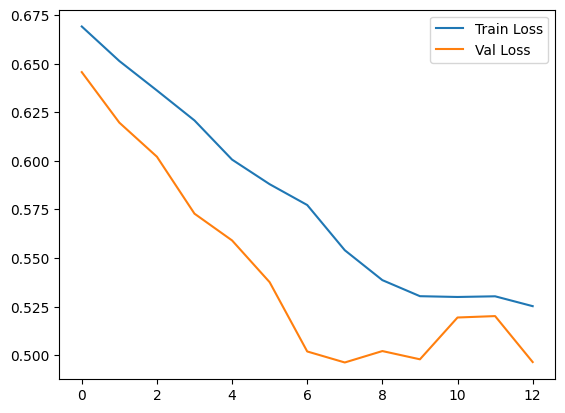

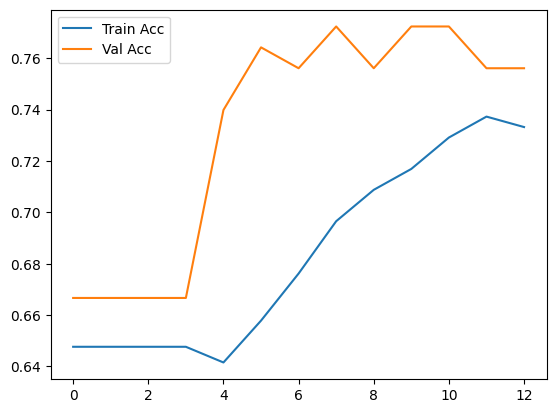

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model2.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with validation split (20%)
history = model2.fit(
    sc_x_train, y_train,
    validation_split=0.2,
    epochs=50,           # longer, since early stopping will cut if needed
    batch_size=32,       # try 16, 32, 64 to experiment
    callbacks=[early_stop],
    verbose=1
)

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7137 - loss: 0.5320 - precision_11: 0.5791 - recall_6: 0.5747 - val_accuracy: 0.7805 - val_loss: 0.4897 - val_precision_11: 0.6944 - val_recall_6: 0.6098
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7054 - loss: 0.5197 - precision_11: 0.5712 - recall_6: 0.5458 - val_accuracy: 0.7805 - val_loss: 0.4913 - val_precision_11: 0.6944 - val_recall_6: 0.6098
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7398 - loss: 0.5079 - precision_11: 0.6209 - recall_6: 0.5852 - val_accuracy: 0.7480 - val_loss: 0.4925 - val_precision_11: 0.6087 - val_recall_6: 0.6829
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7397 - loss: 0.5124 - precision_11: 0.6064 - recall_6: 0.6972 - val_accuracy: 0.7561 - val_loss: 0.4970 - val_precision_11: 0.6170 - val_recall_6: 0.7073
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7521 - loss: 0.5036 - precision_11: 0.6246 - recall_6: 0.7052 -

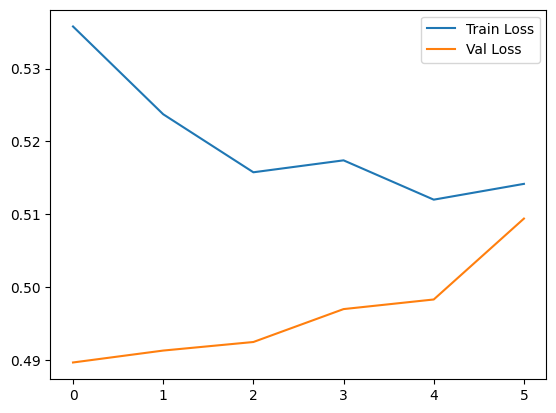

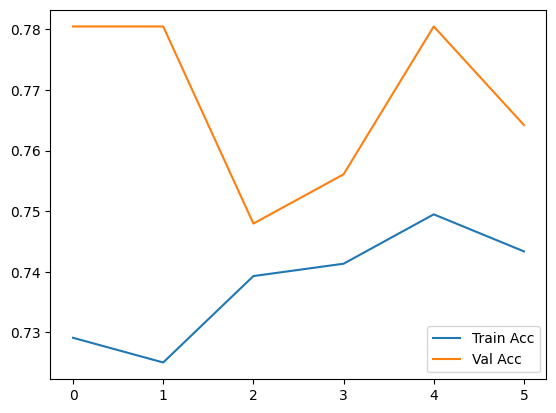

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model2.fit(
    sc_x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# Part 5: Model Evaluation

1. Evaluate on test set:

Calculate accuracy, precision, recall, and F1-score
Create a confusion matrix
Generate classification report


2. Interpret results:

Discuss model performance in the context of the problem
Identify which class is harder to predict and why
Suggest potential improvements




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.8051948051948052
Precision: 0.7857142857142857
Recall: 0.6111111111111112
F1-score: 0.6875


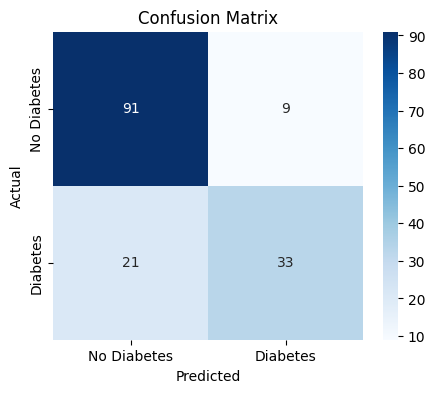


Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.81      0.91      0.86       100
    Diabetes       0.79      0.61      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
y_pred_prob = model2.predict(sc_x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6173 - loss: 1.5208 - precision_2: 0.4019 - recall_2: 0.3790 - val_accuracy: 0.6348 - val_loss: 0.8572 - val_precision_2: 0.4762 - val_recall_2: 0.5000
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6165 - loss: 0.9580 - precision_2: 0.4165 - recall_2: 0.4852 - val_accuracy: 0.6696 - val_loss: 0.7027 - val_precision_2: 0.5238 - val_recall_2: 0.5500
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6890 - loss: 0.7605 - precision_2: 0.5163 - recall_2: 0.4812 - val_accuracy: 0.6957 - val_loss: 0.6721 - val_precision_2: 0.5641 - val_recall_2: 0.5500
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6647 - loss: 0.6914 - precision_2: 0.4792 - recall_2: 0.5141 - val_accuracy: 0.7130 - val_loss: 0.6425 - val_precision_2: 0.5897 - val_recall_2: 0.5750
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6644 - loss: 0.6533 - precision_2: 0.4830 - recall_2: 0.5196 - val_accu

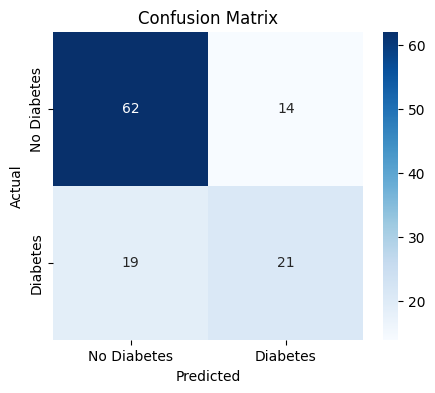


Classification Report:

              precision    recall  f1-score   support

 No Diabetes       0.77      0.82      0.79        76
    Diabetes       0.60      0.53      0.56        40

    accuracy                           0.72       116
   macro avg       0.68      0.67      0.67       116
weighted avg       0.71      0.72      0.71       116



In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Second split: split train (70%) vs validation (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train only on train set, validate on val set
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Final evaluation on test set
print("\nFinal Evaluation on Test Set:")
model.evaluate(X_test, y_test, verbose=1)

y_pred_prob1 = model.predict(X_test)
y_pred1 = (y_pred_prob1 > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred1)
print("Accuracy:", acc)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred1, target_names=["No Diabetes", "Diabetes"]))